In [174]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import scipy.special as sc
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import math
import csv
from scipy.interpolate import interp1d
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from scipy import stats

In [175]:
investimentiSvizzeri=pd.read_csv('dataset/InvestimentiSvizzeriSuiTrasporti.csv',sep=',,',decimal='.')

C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\1335623771.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  investimentiSvizzeri=pd.read_csv('dataset/InvestimentiSvizzeriSuiTrasporti.csv',sep=',,',decimal='.')


In [176]:
investimentiSvizzeri[['Unnamed: 0','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]

,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Costi del trasporto ferroviario,9 792,9 958,10 437,10 600,10 818,10 979,11 250,11 750,11 724,12 095,12 004
1,secondo l'oggetto di trasporto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trasporto persone,7 736,7 953,8 281,8 556,8 753,8 830,9 169,9 371,9 541,9 893,9 880
3,Trasporto merci,2 057,2 005,2 156,2 045,2 065,2 150,2 081,2 379,2 183,2 201,2 125
4,secondo la categoria di costo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Infrastruttura,4 365,4 527,4 793,4 802,4 871,5 043,5 385,5 509,5 583,5 861,5 745
6,Mezzi di trasporto,4 359,4 336,4 504,4 692,4 803,4 757,4 751,5 085,4 925,5 003,5 103
7,Incidenti,104,110,137,88,103,120,32,58,91,78,71
8,Ambiente e salute,964,986,1 003,1 019,1 041,1 059,1 082,1 098,1 126,1 152,1 085
9,secondo le unità finali d'imputazione,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
investimentiPuliti=investimentiSvizzeri[['Unnamed: 0','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]
investimentiPuliti = investimentiPuliti.rename(columns={'Unnamed: 0': 'tipo di investimento'})
investimentiPuliti

,tipo di investimento,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Costi del trasporto ferroviario,9 792,9 958,10 437,10 600,10 818,10 979,11 250,11 750,11 724,12 095,12 004
1,secondo l'oggetto di trasporto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trasporto persone,7 736,7 953,8 281,8 556,8 753,8 830,9 169,9 371,9 541,9 893,9 880
3,Trasporto merci,2 057,2 005,2 156,2 045,2 065,2 150,2 081,2 379,2 183,2 201,2 125
4,secondo la categoria di costo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Infrastruttura,4 365,4 527,4 793,4 802,4 871,5 043,5 385,5 509,5 583,5 861,5 745
6,Mezzi di trasporto,4 359,4 336,4 504,4 692,4 803,4 757,4 751,5 085,4 925,5 003,5 103
7,Incidenti,104,110,137,88,103,120,32,58,91,78,71
8,Ambiente e salute,964,986,1 003,1 019,1 041,1 059,1 082,1 098,1 126,1 152,1 085
9,secondo le unità finali d'imputazione,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
def convertiRigaInIntero(investimentiPuliti,nomeRiga):
   riga = investimentiPuliti[investimentiPuliti['tipo di investimento'] == nomeRiga]
   year_columns = ['2010', '2011', '2012', '2013', '2014', '2015', 
               '2016', '2017', '2018', '2019', '2020']
   riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)
   return riga

In [179]:
trasportiPersoneSvizzera=convertiRigaInIntero(investimentiPuliti,'Trasporto persone')
trasportiMerci=convertiRigaInIntero(investimentiPuliti,'Trasporto merci')

C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)
C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


In [180]:
trasportiPersoneSvizzera

,tipo di investimento,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Trasporto persone,7736.0,7953.0,8281.0,8556.0,8753.0,8830.0,9169.0,9371.0,9541.0,9893.0,9880.0


C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


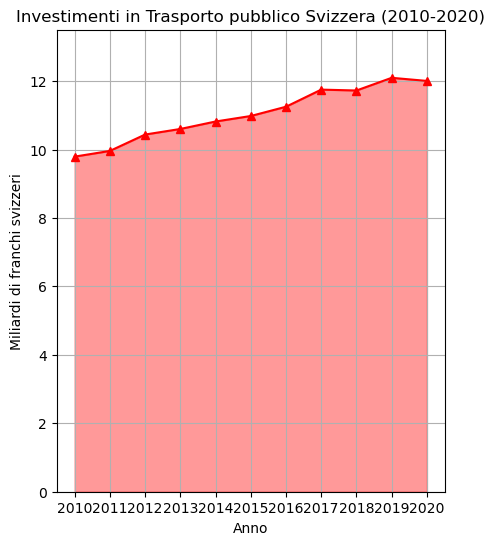

In [181]:
invGenSvizzera=convertiRigaInIntero(investimentiPuliti,'Costi del trasporto ferroviario')
plt.figure(figsize=(5,6))
plt.plot(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:]/1000, color='#FF0000',marker='^')
plt.fill_between(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:].astype(float)/1000, alpha=0.4,color='#FF0000')
plt.xlabel('Anno')
plt.ylabel('Miliardi di franchi svizzeri')
plt.title('Investimenti in Trasporto pubblico Svizzera (2010-2020)')
plt.ylim(0,13.5)
plt.grid(True)
plt.show()

In [182]:
12005.0/9793.0

1.2258756254467478

In [183]:
trasportiPersoneSvizzera.iloc[0, 1:]+trasportiMerci.iloc[0, 1:]

2010     9793.0
2011     9958.0
2012    10437.0
2013    10601.0
2014    10818.0
2015    10980.0
2016    11250.0
2017    11750.0
2018    11724.0
2019    12094.0
2020    12005.0
dtype: object

C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


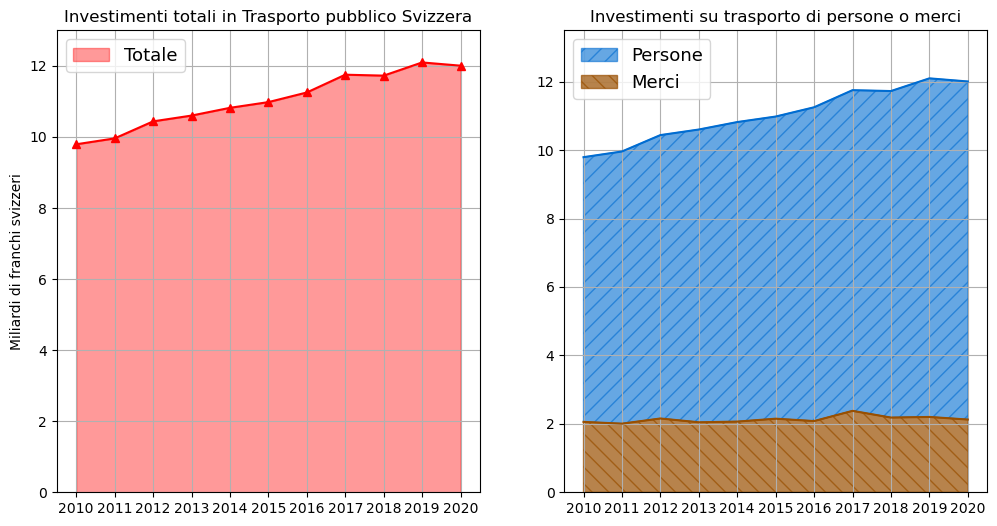

In [184]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.ylim(0,13.5)
invGenSvizzera=convertiRigaInIntero(investimentiPuliti,'Costi del trasporto ferroviario')
axs[0].plot(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:]/1000, color='#FF0000',marker='^')
axs[0].fill_between(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:].astype(float)/1000, alpha=0.4,color='#FF0000',label='Totale')
axs[0].grid(True)
axs[0].legend(prop={'size': 13} ,loc=2)
axs[0].set_title('Investimenti totali in Trasporto pubblico Svizzera')
axs[0].set_ylabel('Miliardi di franchi svizzeri')
axs[0].set_ylim(0,13)

axs[1].plot(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:]/1000, color='#006CD1')
axs[1].fill_between(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:].astype(float)/1000,trasportiMerci.iloc[0, 1:].astype(float)/1000, alpha=0.6,color='#006CD1',label='Persone',hatch="//")


axs[1].plot(trasportiMerci.columns[1:], trasportiMerci.iloc[0, 1:]/1000, color='#994F00')
axs[1].fill_between(trasportiMerci.columns[1:], trasportiMerci.iloc[0, 1:].astype(float)/1000, alpha=0.7,color='#994F00',label='Merci',hatch="\\\\")
axs[1].grid(True)
axs[1].legend(prop={'size': 13} ,loc=2)
axs[1].set_title('Investimenti su trasporto di persone o merci')
plt.show()

Di quanto sono aumentati gli investimenti sul trasporto delle persone pubblico?

In [185]:
incrementoDecennale=trasportiPersoneSvizzera.iloc[0, 1:].values.max()-trasportiPersoneSvizzera.iloc[0, 1:].values.min()
incrementoDecennale

2157.0

In [186]:
incrementoDecennale/trasportiPersoneSvizzera.iloc[0, 1:].values.min()*100

27.882626680455015

2.157 Miliardi in 10 anni, che rappresenta un incremento del $$ +27.88 \% $$

In [187]:
invInfrastruttura=convertiRigaInIntero(investimentiPuliti,'Infrastruttura')

invMezzi=convertiRigaInIntero(investimentiPuliti,'Mezzi di trasporto')

C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)
C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


In [188]:
invInfrastrutturaInMiliardiFranchi=invInfrastruttura.iloc[0, 1:].values/1000
invInfrastrutturaInMiliardiFranchi

array([4.365, 4.527, 4.793, 4.802, 4.871, 5.043, 5.385, 5.509, 5.583,
       5.861, 5.745], dtype=object)

C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


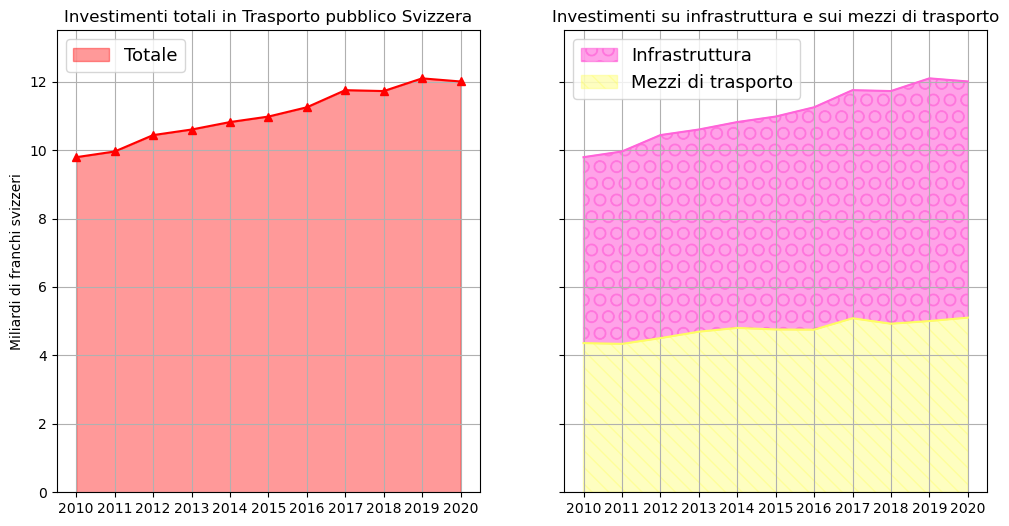

In [189]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plt.ylim(0,13.5)
invGenSvizzera=convertiRigaInIntero(investimentiPuliti,'Costi del trasporto ferroviario')
axs[0].plot(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:]/1000, color='#FF0000',marker='^')
axs[0].fill_between(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:].astype(float)/1000, alpha=0.4,color='#FF0000',label='Totale')
axs[0].grid(True)
axs[0].legend(prop={'size': 13} ,loc=2)
axs[0].set_title('Investimenti totali in Trasporto pubblico Svizzera')
axs[0].set_ylabel('Miliardi di franchi svizzeri')

axs[1].plot(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:]/1000, color='#FF64D9')
axs[1].fill_between(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:].astype(float)/1000,invMezzi.iloc[0, 1:].astype(float)/1000, alpha=0.6,color='#FF64D9',label='Infrastruttura',hatch="O")
axs[1].plot(invMezzi.columns[1:], invMezzi.iloc[0, 1:]/1000, color='#FEFE62')
axs[1].fill_between(invMezzi.columns[1:], invMezzi.iloc[0, 1:].astype(float)/1000,alpha=0.4,color='#FEFE62',label='Mezzi di trasporto',hatch="\\\\")
axs[1].grid(True)
axs[1].legend(prop={'size': 13} ,loc=2)
axs[1].set_title('Investimenti su infrastruttura e sui mezzi di trasporto')
plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


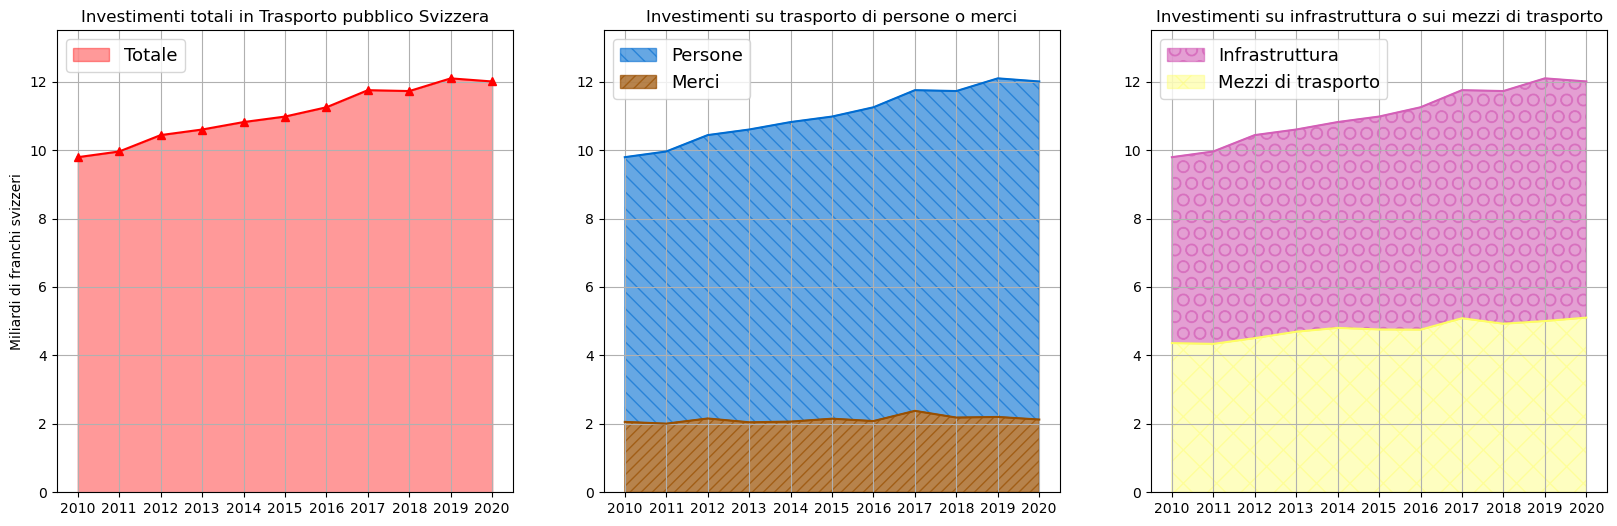

In [190]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_ylim(0,13.5)
axs[0].set_ylabel("Miliardi di franchi svizzeri")
invGenSvizzera=convertiRigaInIntero(investimentiPuliti,'Costi del trasporto ferroviario')
axs[0].plot(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:]/1000, color='#FF0000',marker='^')
axs[0].fill_between(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:].astype(float)/1000, alpha=0.4,color='#FF0000',label='Totale')
axs[0].grid(True)
axs[0].legend(prop={'size': 13} ,loc=2)
axs[0].set_title('Investimenti totali in Trasporto pubblico Svizzera')

axs[1].plot(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:]/1000, color='#006CD1')
axs[1].fill_between(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:].astype(float)/1000,trasportiMerci.iloc[0, 1:].astype(float)/1000, alpha=0.6,color='#006CD1',label='Persone',hatch="\\\\")
axs[1].plot(trasportiMerci.columns[1:], trasportiMerci.iloc[0, 1:]/1000, color='#994F00')
axs[1].fill_between(trasportiMerci.columns[1:], trasportiMerci.iloc[0, 1:].astype(float)/1000, alpha=0.7,color='#994F00',label='Merci',hatch="///")
axs[1].grid(True)
axs[1].legend(prop={'size': 13} ,loc=2)
axs[1].set_title('Investimenti su trasporto di persone o merci')
axs[1].set_ylim(0,13.5)

axs[2].plot(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:]/1000, color='#D35FB7')
axs[2].fill_between(invGenSvizzera.columns[1:], invGenSvizzera.iloc[0, 1:].astype(float)/1000,invMezzi.iloc[0, 1:].astype(float)/1000, alpha=0.6,color='#D35FB7',label='Infrastruttura',hatch="O")
axs[2].plot(invMezzi.columns[1:], invMezzi.iloc[0, 1:]/1000, color='#FEFE62')
axs[2].fill_between(invMezzi.columns[1:], invMezzi.iloc[0, 1:].astype(float)/1000,alpha=0.4,color='#FEFE62',label='Mezzi di trasporto',hatch="X")
axs[2].grid(True)
axs[2].set_ylim(0,13.5)
axs[2].legend(prop={'size': 13} ,loc=2)

axs[2].set_title('Investimenti su infrastruttura o sui mezzi di trasporto')
plt.show()

In [191]:
invInfrastruttura.columns[1:]

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [192]:
invInfrastruttura.iloc[0, 1:].index

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [193]:
investimentiItaliani=pd.read_csv('dataset/InvItaMezziTrasporto.csv',sep=',',decimal='.')
investimentiItaliani

,Regione,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Piemonte,2184865.2,2818137.4,2428355.7,2963767.6,2900019.2,3203400.9,2923131.0,2831031.7,3046192.2,...,2374446.1,2286586.5,2009243.6,2112479.4,1910793.5,1919954.1,2085201.2,1944648.3,2110696.1,2189214.5
1,Valle d'Aosta,66188.9,96965.7,131866.3,184283.2,180324.5,198745.5,168971.5,159655.1,161621.1,...,118291.1,92445.4,92018.6,101272.2,105594.5,102547.3,97368.1,88982.5,76061.9,95921.3
2,Liguria,1740907.4,2043224.0,1889241.0,1935658.7,1985731.3,1914879.2,1786075.1,1681659.8,1638457.7,...,1359364.8,1218131.0,1357698.9,1316155.4,1105423.1,1181875.0,1147836.3,1193063.5,1174840.9,1577502.1
3,Lombardia,4461185.2,5084574.6,4715455.4,4955532.4,5245139.4,5755981.7,6069792.5,6528122.5,6174904.0,...,6073047.2,6009082.9,6329971.5,6145688.1,6006381.8,6128007.7,5964439.0,5866326.5,5614861.7,6099575.3
4,Veneto,1937144.8,2391998.4,2591174.4,2863787.8,3111739.3,3071778.7,2975343.4,2949823.1,2899414.9,...,2570534.5,2303082.8,2235946.0,2165522.5,1945170.3,1899367.1,1910838.5,1954812.1,2029169.9,2053476.8
5,Emilia Romagna,2365137.1,2309064.5,2378673.1,2494064.4,2659653.7,2640327.0,2420403.5,2229428.5,2222725.9,...,2052494.4,1953676.7,2001824.8,1841720.5,1651184.3,1740840.4,1761642.4,1835146.9,1822867.5,2009596.4
6,Toscana,2464919.4,2458568.6,2555353.7,3039549.6,3171311.3,3278845.4,2953883.7,2741309.5,2871366.4,...,2339024.5,1834589.5,2086885.4,2012580.5,1749317.7,1976528.0,1797316.3,1899107.5,1785542.6,1885663.5
7,Lazio,4992230.2,9999766.1,5603825.9,5813206.9,6013375.1,6304475.2,7019431.1,8678087.5,5522299.3,...,5733300.7,5381626.1,4724525.4,4793536.8,4038144.7,4169668.0,3765016.2,3722589.5,3788567.4,4172584.6
8,Campania,3614325.0,3734461.6,3112324.3,3606263.0,4031198.0,3668283.3,3727558.8,3944532.5,3600619.0,...,2968305.8,2573522.0,2526542.2,2469547.1,2303293.0,2032784.9,2128515.3,1967423.9,2095817.2,2134624.3
9,Sicilia,1765142.2,2132522.3,1668032.4,1667580.5,1703036.1,1850077.1,1953773.3,1999536.1,1752828.2,...,1515702.9,1368457.5,1292527.1,1466723.6,1295753.7,1281599.4,1446730.7,1383560.9,1405710.1,1692610.6


In [194]:
investimentiItalia=investimentiItaliani[investimentiItaliani['Regione']=='Italia']
investimentiItalia

,Regione,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
15,Italia,32122985.0,40464816.7,33377099.6,36386874.5,37809254.0,39005697.1,39175536.5,40734609.5,36945296.1,...,33328160.8,30695249.8,30178308.1,29914921.7,27290554.5,27584535.8,27659993.9,26996924.4,27332346.9,29658188.8


In [195]:
investimentiItalia.iloc[0, 2:].astype(float).min()/investimentiItalia.iloc[0, 2:].astype(float).max()*100

66.27515209149114

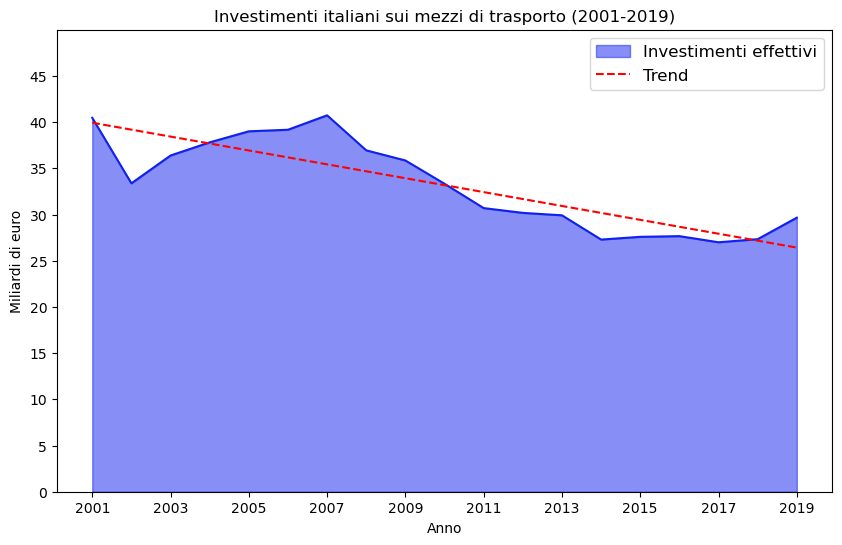

In [196]:
maxInv=50000000
plt.figure(figsize=(10,6))
x = investimentiItalia.columns[2:].astype(int)
y = investimentiItalia.iloc[0, 2:].astype(float)

coefficients = np.polyfit(x, y, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_ita = np.linspace(x.min(), x.max(), 100)
y_fit_ita = linear_fit(x_fit_ita)

plt.plot(x, y,color='#1021EF')
plt.fill_between(x, y, alpha=0.5,label='Investimenti effettivi',color='#1021EF')

plt.plot(x_fit_ita, y_fit_ita, '--', label='Trend' ,color='#FF0000')

plt.xticks(np.arange(x.min(), x.max()+1, step=2))
plt.yticks(np.arange(0, maxInv, step=5000000))


def scale_y(value, tick_number):
    return f'{value * 1e-6:.0f}'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(scale_y))
plt.xlabel('Anno')
plt.ylabel('Miliardi di euro')
plt.title('Investimenti italiani sui mezzi di trasporto (2001-2019)')
plt.legend(prop={'size': 12})
plt.ylim(0,maxInv)
plt.show()

Compariamo ora alla svizzera 

In [197]:
invTrasportoSvizzera=convertiRigaInIntero(investimentiPuliti,'Costi del trasporto ferroviario')
invTrasportoSvizzera.iloc[0, 2:].astype(float)

C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


2011     9958.0
2012    10437.0
2013    10600.0
2014    10818.0
2015    10979.0
2016    11250.0
2017    11750.0
2018    11724.0
2019    12095.0
2020    12004.0
Name: 0, dtype: float64

In [198]:
x = invTrasportoSvizzera.columns[2:].astype(int)
y = invTrasportoSvizzera.iloc[0, 2:].astype(float)

coefficients = np.polyfit(x, y, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_ch = np.linspace(x.min(), x.max(), 100)
y_fit_ch = linear_fit(x_fit_ch)


Ora compariamo anche la lombardia

In [199]:
invLombardia=investimentiItaliani[investimentiItaliani['Regione']=='Lombardia']
x_lombardia = invLombardia.columns[2:].astype(int)
y_lombardia_inflazione = invLombardia.iloc[0, 2:].astype(float)/1000000

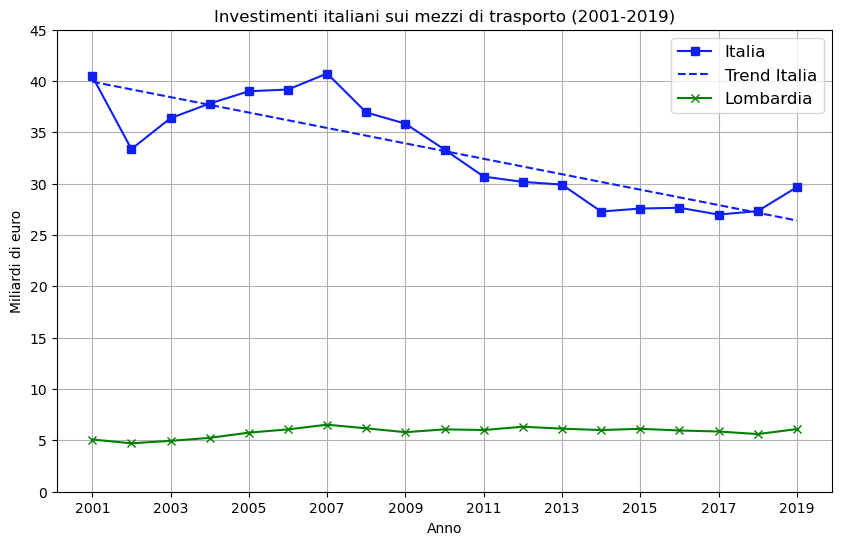

In [200]:
plt.figure(figsize=(10,6))
x = investimentiItalia.columns[2:].astype(int)
y = investimentiItalia.iloc[0, 2:].astype(float)/1000000

coefficients = np.polyfit(x, y, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_ita = np.linspace(x.min(), x.max(), 100)
y_fit_ita = linear_fit(x_fit_ita)

plt.plot(x, y,color='#1021EF',label='Italia',marker='s')
plt.plot(x_fit_ita, y_fit_ita, '--', label='Trend Italia' ,color='#1021EF')
plt.xticks(np.arange(x.min(), x.max()+1, step=2))
plt.grid(True)
plt.plot(x_lombardia, y_lombardia_inflazione, label='Lombardia', color='green',marker='x')
plt.xlabel('Anno')
plt.ylabel('Miliardi di euro')
plt.title('Investimenti italiani sui mezzi di trasporto (2001-2019)')
plt.legend(prop={'size': 12})
plt.ylim(0,45)
plt.show()

In [201]:
29.658189/40.464817

0.7329376776867669

In [202]:
y

2001    40.464817
2002    33.377100
2003    36.386874
2004    37.809254
2005    39.005697
2006    39.175536
2007    40.734609
2008    36.945296
2009    35.848583
2010    33.328161
2011    30.695250
2012    30.178308
2013    29.914922
2014    27.290554
2015    27.584536
2016    27.659994
2017    26.996924
2018    27.332347
2019    29.658189
Name: 15, dtype: float64

In [203]:
y_lombardia_inflazione

2001    5.084575
2002    4.715455
2003    4.955532
2004    5.245139
2005    5.755982
2006    6.069793
2007    6.528123
2008    6.174904
2009    5.797371
2010    6.073047
2011    6.009083
2012    6.329972
2013    6.145688
2014    6.006382
2015    6.128008
2016    5.964439
2017    5.866327
2018    5.614862
2019    6.099575
Name: 3, dtype: float64

In [204]:
6.099575/5.084575

1.1996233706848654

In [205]:
conversioneEuroFranchi=pd.read_csv('dataset/conversioneEuroFranco.csv',sep=',',decimal='.')
conversioneEuroFranchi

,Year,Average,Variation
0,2024,0.95,1.85
1,2023,0.97,-6.25
2,2022,1.01,-4.34
3,2021,1.08,-5.57
4,2020,1.07,1.12
5,2019,1.11,-3.90
6,2018,1.16,-3.48
7,2017,1.11,9.16
8,2016,1.09,-1.48
9,2015,1.07,-9.52


In [206]:
conversioneEuroFranchi1120=conversioneEuroFranchi[conversioneEuroFranchi['Year']>=2011]
conversioneEuroFranchi1120=conversioneEuroFranchi1120[conversioneEuroFranchi1120['Year']<=2020]
conversioneEuroFranchi1120['francoEuro']= 1/conversioneEuroFranchi1120['Average']
conversioneEuroFranchi1120

,Year,Average,Variation,francoEuro
4,2020,1.07,1.12,0.934579
5,2019,1.11,-3.90,0.900901
6,2018,1.16,-3.48,0.862069
7,2017,1.11,9.16,0.900901
8,2016,1.09,-1.48,0.917431
9,2015,1.07,-9.52,0.934579
10,2014,1.21,-1.98,0.826446
11,2013,1.23,1.64,0.813008
12,2012,1.20,-0.50,0.833333
13,2011,1.23,-2.85,0.813008


In [207]:
valoriSvizzera=invTrasportoSvizzera.iloc[0, 2:].astype(int)
valoriSvizzera

2011     9958
2012    10437
2013    10600
2014    10818
2015    10979
2016    11250
2017    11750
2018    11724
2019    12095
2020    12004
Name: 0, dtype: int32

In [208]:
svizzera=pd.DataFrame(valoriSvizzera)
svizzera.columns=['investimenti']
svizzera['investimentiEuro']= svizzera['investimenti']*conversioneEuroFranchi1120['francoEuro'].values
svizzera['investimentiEuro'].index.astype(int)

Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int32')

In [209]:
x_ch_euro=svizzera.index.astype(int)
y_ch_euro=svizzera['investimentiEuro'].values/1000
y_ch_euro

array([ 9.30654206,  9.4027027 ,  9.13793103,  9.74594595, 10.07247706,
       10.51401869,  9.7107438 ,  9.53170732, 10.07916667,  9.75934959])

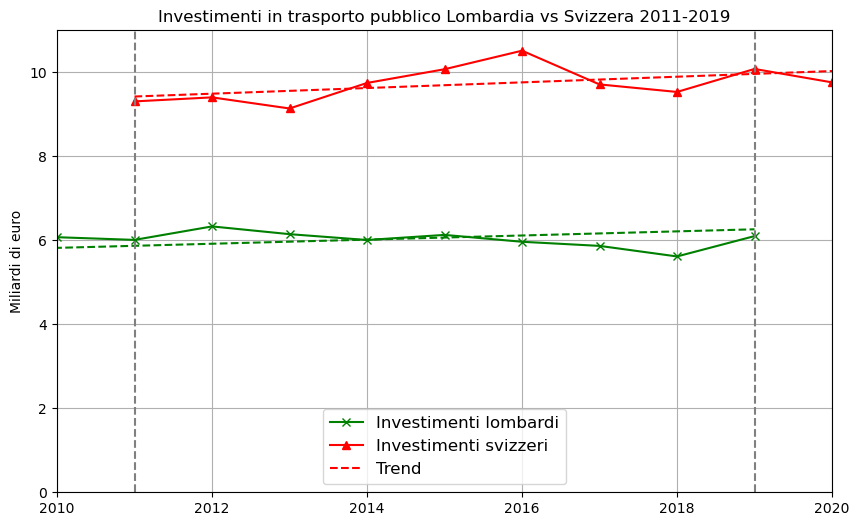

In [210]:
plt.figure(figsize=(10,6))
plt.plot(x_lombardia, y_lombardia_inflazione, label='Investimenti lombardi', color='green',marker='x')
plt.plot(x_ch_euro,y_ch_euro, label='Investimenti svizzeri', color='#FF0000',marker='^')

coefficients = np.polyfit(x_lombardia, y_lombardia_inflazione, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_lomb = np.linspace(x_lombardia.min(), x_lombardia.max(), 100)
y_fit_lomb = linear_fit(x_fit_lomb)
plt.plot(x_fit_lomb, y_fit_lomb, '--' , color='green')

coefficients = np.polyfit(x_ch_euro, y_ch_euro, deg=1)
linear_fit = np.poly1d(coefficients)
x_fix_ch = np.linspace(x_ch_euro.min(), x_ch_euro.max(), 100)
y_fit_ch = linear_fit(x_fix_ch)
plt.plot(x_fix_ch, y_fit_ch, '--', label='Trend' ,color='#FF0000')

plt.xlim(2010,2020)
plt.ylim(0,11)
plt.grid(True)
plt.ylabel('Miliardi di euro')
plt.axvline(x=2011,  color='gray',linestyle='--')
plt.axvline(x=2019,  color='gray',linestyle='--')
plt.title('Investimenti in trasporto pubblico Lombardia vs Svizzera 2011-2019')
plt.legend(prop={'size': 12} )
plt.show()

A questo punto compariamo sia italia che lombardia alla svizzera

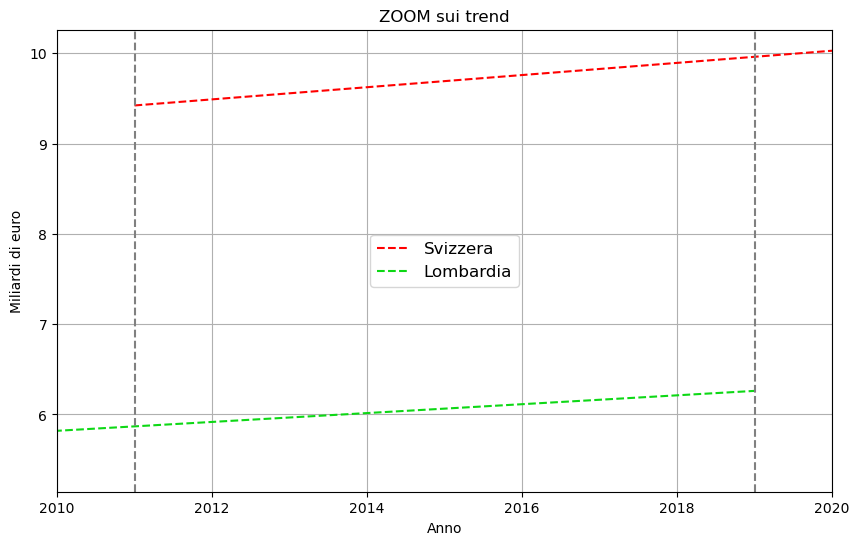

In [211]:
plt.figure(figsize=(10,6))
plt.plot(x_fit_ch, y_fit_ch, '--', label='Svizzera' ,color='#FF0000')
plt.plot(x_fit_lomb, y_fit_lomb, '--', label='Lombardia' ,color='#0DD815')
plt.xlabel('Anno')
plt.ylabel('Miliardi di euro')
plt.title('ZOOM sui trend')
plt.xlim(2010,2020)
plt.grid(True)
plt.axvline(x=2011, color='gray', linestyle='--')
plt.axvline(x=2019, color='gray', linestyle='--')
plt.legend(prop={'size': 12} ,loc=10)
plt.show()

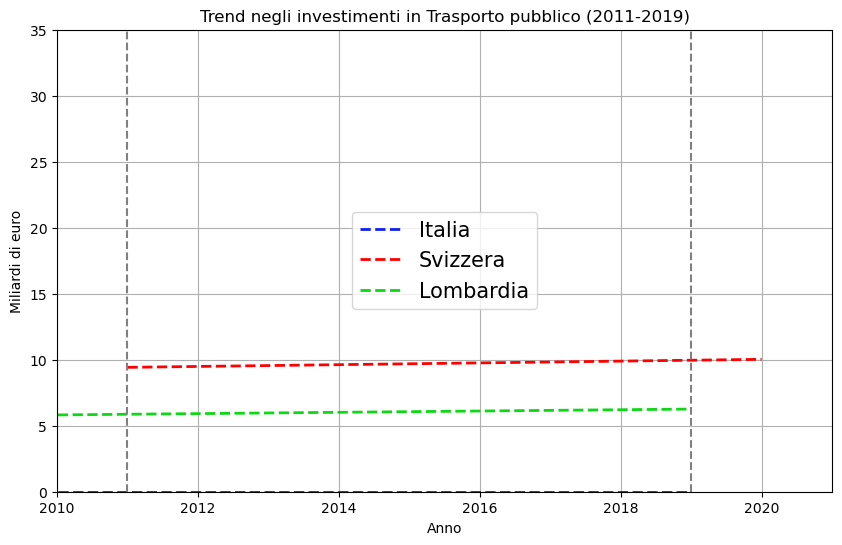

In [212]:
plt.figure(figsize=(10,6))
plt.plot(x_fit_ita, y_fit_ita/1000000, '--', label='Italia' ,color='#1021EF',linewidth=2)
plt.plot(x_fit_ch, y_fit_ch, '--', label='Svizzera' ,color='#FF0000',linewidth=2)
plt.plot(x_fit_lomb, y_fit_lomb, '--', label='Lombardia' ,color='#0DD815',linewidth=2)
plt.xlabel('Anno')
plt.ylabel('Miliardi di euro')
plt.title('Trend negli investimenti in Trasporto pubblico (2011-2019)')
plt.xlim(2010,2021)

plt.ylim(0,35)
plt.grid(True)
plt.axvline(x=2011, color='gray', linestyle='--')
plt.axvline(x=2019, color='gray', linestyle='--')
plt.legend(prop={'size': 15} ,loc=10)
plt.show()

Questo non guarda neanche l'inflazione!


In [213]:
inflazioneIta=pd.read_csv('dataset/InflazioneItalia.csv',sep=';',decimal=',')
inflazioneIta

,anno,inflazione
0,2021,1.9
1,2020,-0.2
2,2019,0.6
3,2018,1.2
4,2017,1.2
5,2016,-0.1
6,2015,0.1
7,2014,0.2
8,2013,1.2
9,2012,3.0


In [214]:
inflazioneCH=pd.read_csv('dataset/InflazioneSvizzera.csv',sep=';',decimal=',')
inflazioneCH

,anno,inflazione
0,2021,1.53
1,2020,-0.81
2,2019,0.16
3,2018,0.69
4,2017,0.84
5,2016,-0.01
6,2015,-1.31
7,2014,-0.33
8,2013,0.07
9,2012,-0.43


Farò un bel grafico che compara l'inflazione tra i due paesi, per poi aggiustare i grafici in base all'inflazione

In [215]:
years = inflazioneCH['anno'].iloc[::-1].values
inflazioneSvizzera = inflazioneCH['inflazione'].iloc[::-1].values
inflazioneItalia = inflazioneIta['inflazione'].iloc[::-1].values

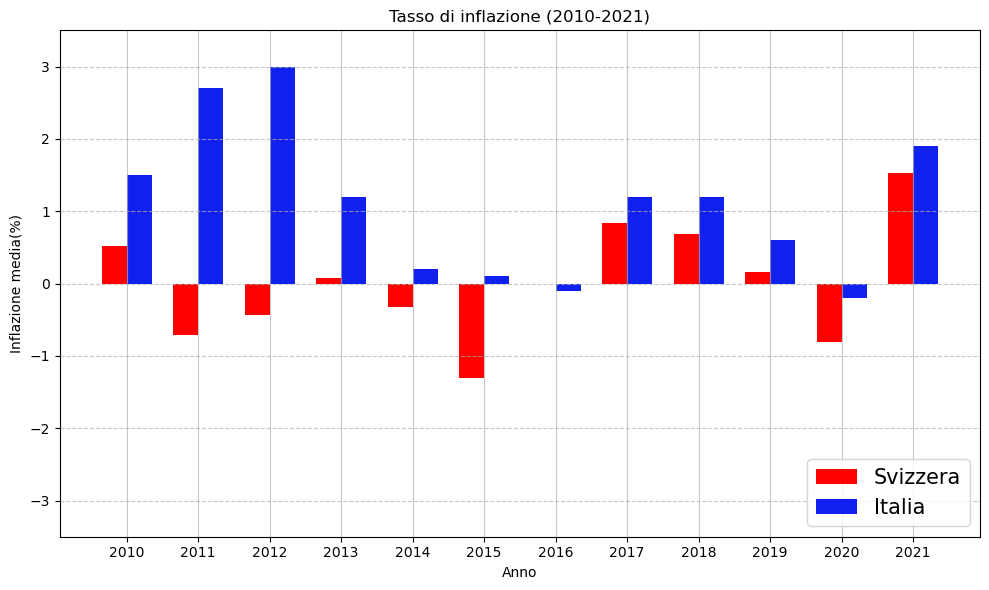

In [216]:
bar_width = 0.35
plt.figure(figsize=(10,6))
indices = np.arange(len(years))
plt.bar(indices, inflazioneSvizzera, width=bar_width, label='Svizzera', color='#FF0000')
plt.bar(indices + bar_width, inflazioneItalia, width=bar_width, label='Italia', color='#1021EF')
plt.xlabel('Anno')
plt.ylabel('Inflazione media(%)')
plt.title('Tasso di inflazione (2010-2021)')
plt.xticks(indices + bar_width / 2, years)

plt.legend(loc=4,prop={'size': 15})
plt.ylim(-3.5,3.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='-', alpha=0.7)

plt.tight_layout()
plt.show()

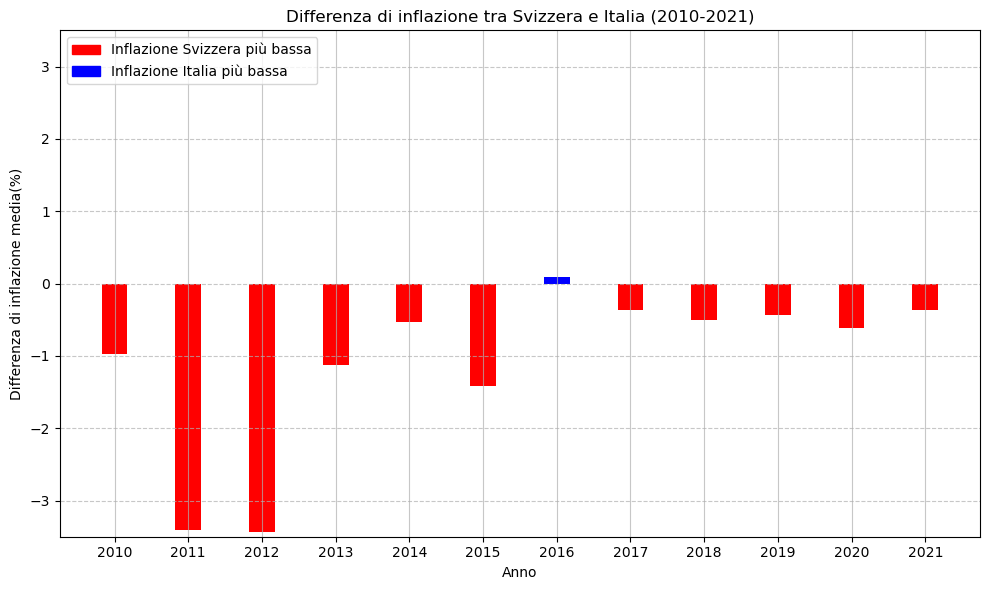

In [217]:
difference = inflazioneSvizzera - inflazioneItalia
colors = ['#FF0000' if a < b else 'blue' for a, b in zip(inflazioneSvizzera, inflazioneItalia)]
plt.figure(figsize=(10,6))
plt.bar(indices + bar_width / 2, difference, width=bar_width, color=colors)

plt.xlabel('Anno')
plt.ylabel('Differenza di inflazione media(%)')
plt.title('Differenza di inflazione tra Svizzera e Italia (2010-2021)')
plt.xticks(indices + bar_width / 2, years)

# Create custom legend entries
switzerland_patch = mpatches.Patch(color='#FF0000', label='Inflazione Svizzera più bassa')
italy_patch = mpatches.Patch(color='blue', label='Inflazione Italia più bassa')

# Add the custom legend
plt.legend(handles=[switzerland_patch, italy_patch], loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.ylim(-3.5,3.5)
plt.tight_layout()
plt.show()

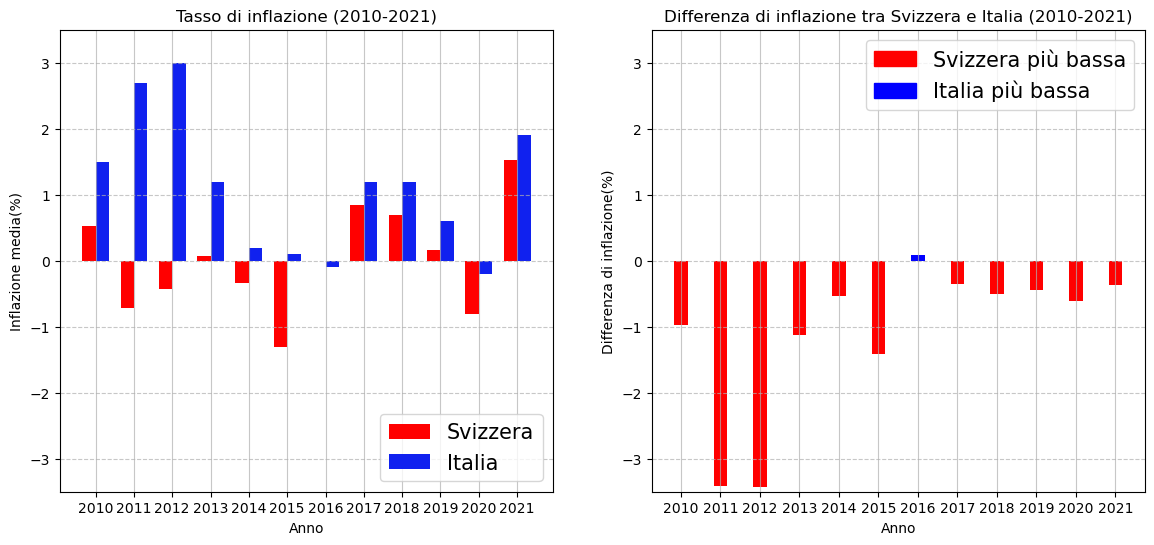

In [218]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
bar_width = 0.35

indices = np.arange(len(years))
ax[0].bar(indices, inflazioneSvizzera, width=bar_width, label='Svizzera', color='#FF0000')
ax[0].bar(indices + bar_width, inflazioneItalia, width=bar_width, label='Italia', color='#1021EF')
ax[0].set_xlabel('Anno')
ax[0].set_ylabel('Inflazione media(%)')
ax[0].set_title('Tasso di inflazione (2010-2021)')
ax[0].set_xticks(indices + bar_width / 2, years)
ax[0].legend(loc=4,prop={'size': 15})
ax[0].set_ylim(-3.5,3.5)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].grid(axis='x', linestyle='-', alpha=0.7)

ax[1].bar(indices + bar_width / 2, difference, width=bar_width, color=colors)
ax[1].set_xlabel('Anno')
ax[1].set_ylabel('Differenza di inflazione(%)')
ax[1].set_title('Differenza di inflazione tra Svizzera e Italia (2010-2021)')
ax[1].set_xticks(indices + bar_width / 2, years)
switzerland_patch = mpatches.Patch(color='#FF0000', label='Svizzera più bassa')
italy_patch = mpatches.Patch(color='blue', label='Italia più bassa')
ax[1].legend(handles=[switzerland_patch, italy_patch], loc='upper right',prop={'size': 15})
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].grid(axis='x', linestyle='-', alpha=0.7)
ax[1].set_ylim(-3.5,3.5)

plt.show()


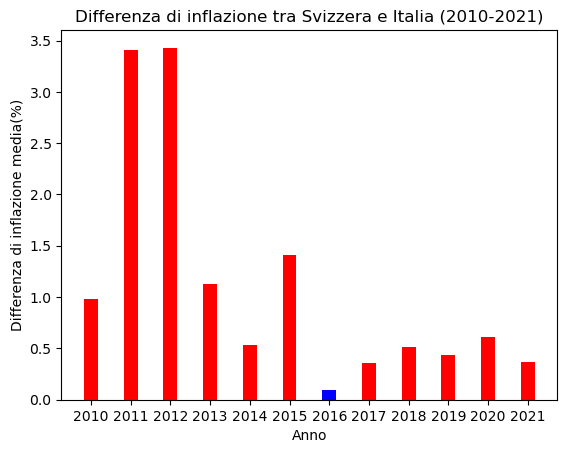

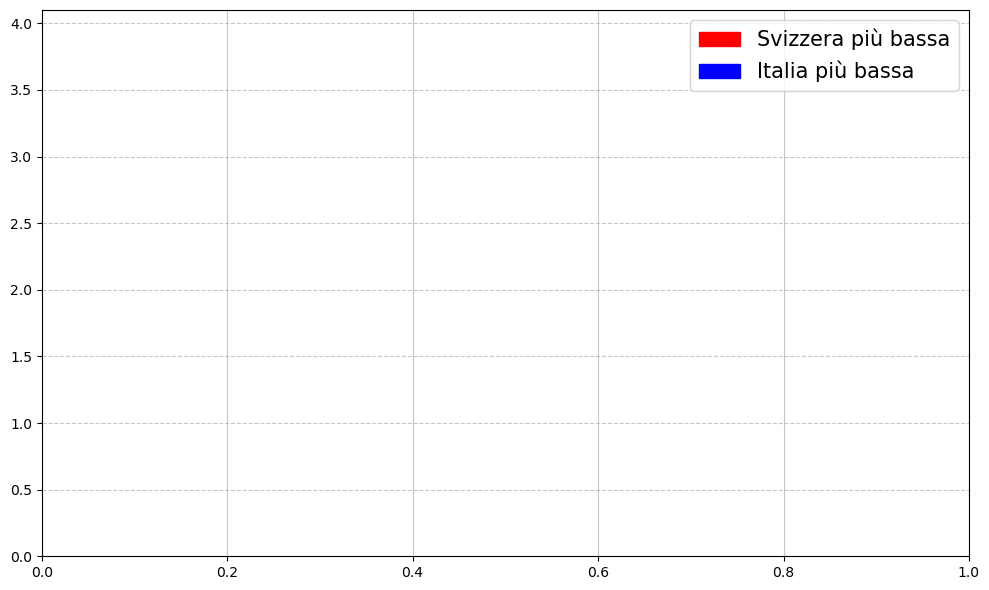

In [219]:
difference = inflazioneSvizzera - inflazioneItalia
colors = ['#FF0000' if a < b else 'blue' for a, b in zip(inflazioneSvizzera, inflazioneItalia)]
plt.bar(indices + bar_width / 2, abs(difference), width=bar_width, color=colors)

plt.xlabel('Anno')
plt.ylabel('Differenza di inflazione media(%)')
plt.title('Differenza di inflazione tra Svizzera e Italia (2010-2021)')
plt.xticks(indices + bar_width / 2, years)

switzerland_patch = mpatches.Patch(color='#FF0000', label='Svizzera più bassa')
italy_patch = mpatches.Patch(color='blue', label='Italia più bassa')
plt.figure(figsize=(10,6))
plt.legend(handles=[switzerland_patch, italy_patch],prop={'size': 15})

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.ylim(0,4.1)
plt.tight_layout()
plt.show()

Spese aggiornate per inflazione rispetto al 2010

In [220]:
invLombardia.iloc[:, 1:] = invLombardia.iloc[:, 1:].apply(lambda x: x / 1000)
invLombardia

,Regione,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,Lombardia,4461.1852,5084.5746,4715.4554,4955.5324,5245.1394,5755.9817,6069.7925,6528.1225,6174.904,...,6073.0472,6009.0829,6329.9715,6145.6881,6006.3818,6128.0077,5964.439,5866.3265,5614.8617,6099.5753


In [221]:
invSvizzera=investimentiPuliti[investimentiPuliti['tipo di investimento']=="Costi del trasporto ferroviario"]
invSvizzera.rename(columns={'tipo di investimento': 'Regione'}, inplace=True)
invSvizzera=investimentiPuliti[investimentiPuliti['tipo di investimento']=="Costi del trasporto ferroviario"]
invSvizzera.rename(columns={'tipo di investimento': 'Regione'}, inplace=True)
inflazioneCH = inflazioneCH.sort_values(by='anno')

inflazioneCH['cumulative_factor'] = (1 + inflazioneCH['inflazione'] / 100).cumprod()
inflazioneCH

C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\3040689189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invSvizzera.rename(columns={'tipo di investimento': 'Regione'}, inplace=True)
C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\3040689189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invSvizzera.rename(columns={'tipo di investimento': 'Regione'}, inplace=True)


,anno,inflazione,cumulative_factor
11,2010,0.52,1.005200
10,2011,-0.71,0.998063
9,2012,-0.43,0.993771
8,2013,0.07,0.994467
7,2014,-0.33,0.991185
6,2015,-1.31,0.978201
5,2016,-0.01,0.978103
4,2017,0.84,0.986319
3,2018,0.69,0.993125
2,2019,0.16,0.994714


In [222]:
inflazioneIta = inflazioneIta.sort_values(by='anno')

# Compute cumulative adjustment factor
inflazioneIta['cumulative_factor'] = (1 + inflazioneIta['inflazione'] / 100).cumprod()
inflazioneIta

,anno,inflazione,cumulative_factor
11,2010,1.5,1.015000
10,2011,2.7,1.042405
9,2012,3.0,1.073677
8,2013,1.2,1.086561
7,2014,0.2,1.088734
6,2015,0.1,1.089823
5,2016,-0.1,1.088733
4,2017,1.2,1.101798
3,2018,1.2,1.115020
2,2019,0.6,1.121710


In [223]:
lombardiaInflazionata = invLombardia.melt(id_vars=['Regione'], var_name='anno', value_name='valore')
lombardiaInflazionata['anno'] = lombardiaInflazionata['anno'].astype(int)
lombardiaInflazionata = lombardiaInflazionata.merge(inflazioneIta[['anno', 'cumulative_factor']], on='anno')
lombardiaInflazionata['adjusted_valore'] = lombardiaInflazionata['valore'] / lombardiaInflazionata['cumulative_factor']
lombardiaInflazionata = lombardiaInflazionata.pivot(index='Regione', columns='anno', values='adjusted_valore').reset_index()
x_lombardia_infl = lombardiaInflazionata.columns[2:].astype(int)
y_lombardia_infl = lombardiaInflazionata.iloc[0, 2:].astype(float)

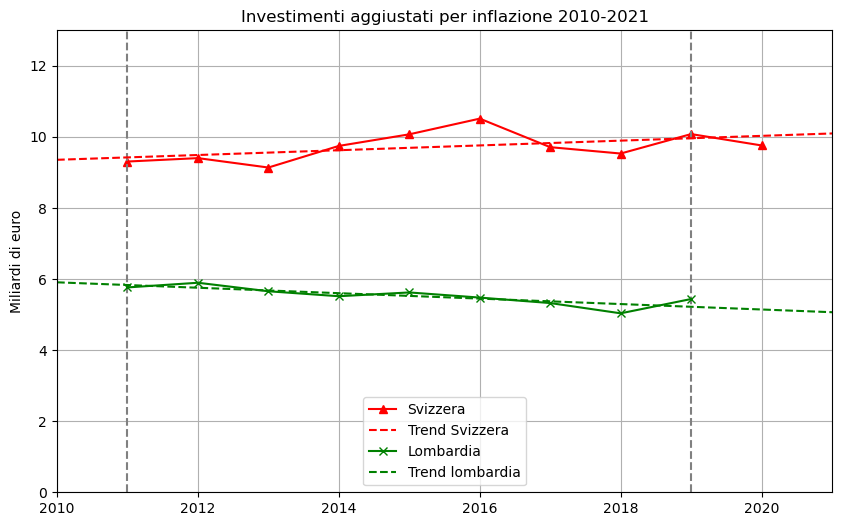

In [251]:
plt.figure(figsize=(10,6))
plt.plot(x_ch_euro, y_ch_euro, label='Svizzera', color='#FF0000',marker='^')
plt.title('Investimenti in trasporto Lombardia vs Svizzera 2010-2021')
plt.axvline(x=2011, color='gray', linestyle='--')
plt.axvline(x=2019, color='gray', linestyle='--')

coefficients = np.polyfit(x_ch_euro, y_ch_euro, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_sv = np.linspace(2010, 2022, 100)
y_fit_sv = linear_fit(x_fit_sv)
plt.plot(x_fit_sv, y_fit_sv, '--', label='Trend Svizzera' ,color='#FF0000')
plt.grid(True)


plt.plot(x_lombardia_infl, y_lombardia_infl/1000, label='Lombardia', color='green', marker='x')

coefficients = np.polyfit(x_lombardia_infl, y_lombardia_infl, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_lomb = np.linspace(2010, 2022, 100)
y_fit_lomb = linear_fit(x_fit_lomb)/1000
plt.plot(x_fit_lomb, y_fit_lomb, '--', label='Trend lombardia' ,color='green')
plt.grid(True)




plt.ylabel('Miliardi di euro')
plt.title('Investimenti aggiustati per inflazione 2010-2021')
plt.legend()
plt.xlim(2010,2021)
plt.ylim(0,13)
plt.show()


In [225]:
#TODO comparare a quello sopra, pre e post aggiornamento inflazione

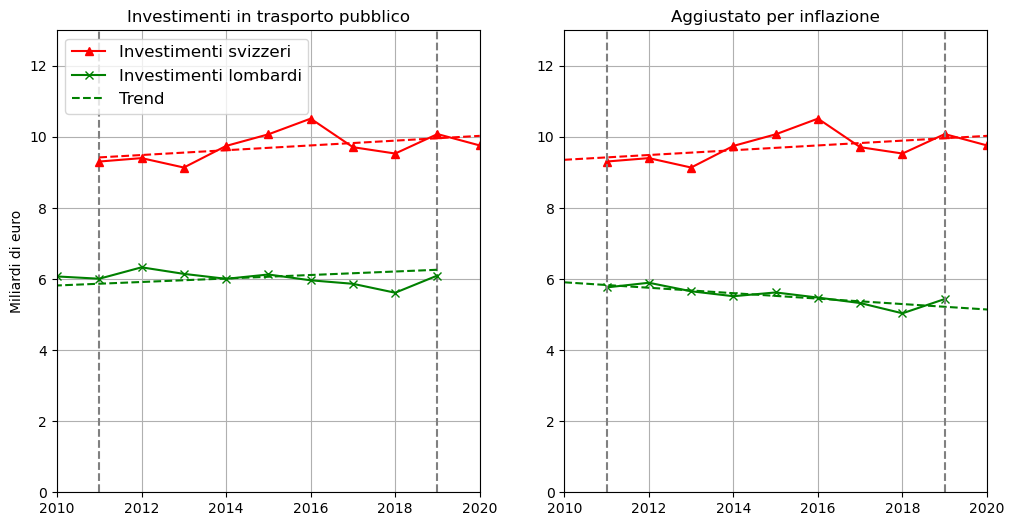

In [252]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

coefficients = np.polyfit(x_ch_euro, y_ch_euro, deg=1)
linear_fit = np.poly1d(coefficients)
x_fix_ch = np.linspace(x_ch_euro.min(), x_ch_euro.max(), 100)
y_fit_ch = linear_fit(x_fix_ch)

axs[0].set_ylim(0,13.000)
axs[0].grid(True)
axs[0].set_xlim(2010,2020)
axs[0].set_ylabel('Miliardi di euro')
axs[0].axvline(x=2011,  color='gray',linestyle='--')
axs[0].axvline(x=2019,  color='gray',linestyle='--')
axs[0].set_title('Investimenti in trasporto pubblico')
axs[0].plot(x_ch_euro,y_ch_euro, label='Investimenti svizzeri', color='#F00',marker='^')
axs[0].plot(x_lombardia, y_lombardia_inflazione, label='Investimenti lombardi', color='green',marker='x')

coefficients = np.polyfit(x_lombardia, y_lombardia_inflazione, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_lomb = np.linspace(x_lombardia.min(), x_lombardia.max(), 100)
y_fit_lomb = linear_fit(x_fit_lomb)
axs[0].plot(x_fit_lomb, y_fit_lomb, '--' ,color='green',label='Trend')
axs[0].plot(x_fix_ch, y_fit_ch, '--' ,color='#F00')
axs[0].legend(loc=2, prop={'size': 12})

axs[1].plot(x_lombardia_infl, y_lombardia_infl/1000, label='Lombardia', color='green', marker='x')
coefficients = np.polyfit(x_lombardia_infl, y_lombardia_infl, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_lomb = np.linspace(2010, 2022, 100)
y_fit_lomb = linear_fit(x_fit_lomb)/1000
axs[1].plot(x_fit_lomb, y_fit_lomb, '--', label='Trend lombardia' ,color='green')
axs[1].grid(True)

axs[1].plot(x_ch_euro, y_ch_euro, label='Svizzera', color='#FF0000',marker='^')
axs[1].axvline(x=2011, color='gray', linestyle='--')
axs[1].axvline(x=2019, color='gray', linestyle='--')
coefficients = np.polyfit(x_ch_euro, y_ch_euro, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_sv = np.linspace(2010, 2022, 100)
y_fit_sv = linear_fit(x_fit_sv)
axs[1].plot(x_fit_sv, y_fit_sv, '--', label='Trend Svizzera' ,color='#FF0000')
axs[1].grid(True)
axs[1].set_title('Aggiustato per inflazione')
axs[1].set_xlim(2010,2020)
axs[1].set_ylim(0,13.000)

plt.show()

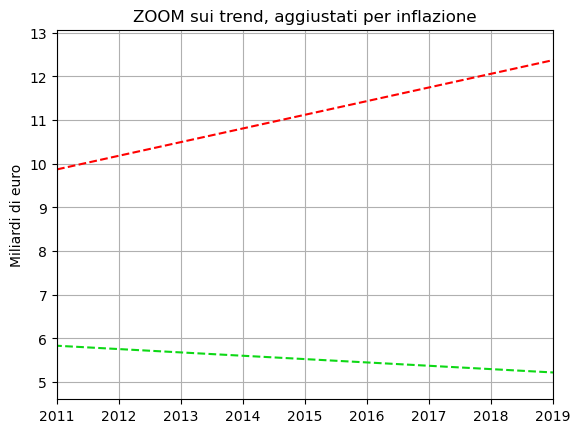

In [227]:
plt.plot(x_fit_lomb, y_fit_lomb, '--' ,color='#0DD815',label='Trend')
plt.plot(x_fix_ch, y_fit_sv, '--' ,color='#F00')
plt.xlim(2011,2019)
plt.grid(True)
plt.title('ZOOM sui trend, aggiustati per inflazione')
plt.ylabel('Miliardi di euro')

plt.show()

Ok ma in svizzera non sono più ricchi? si

Proviamo ad aggiustare per la ricchezza dei popoli per farsi un'idea

Secondo istat e ente statistico svizzero i rispettivi pil ed numero di abitanti sono:

In [228]:
pilItalia=pd.read_csv('dataset/pilItalia.csv',sep=',', engine='python',decimal='.')
pilItalia


,regione,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Italia,988243.2,1045872.7,1092357.3,1138856.1,1175149.5,1241512.9,1304136.8,1350258.9,1394693.2,...,1612751.2,1627405.6,1655355.0,1695786.8,1736592.7,1771391.2,1796648.5,1661239.8,1822344.5,1946479.1
1,Lombardia,209519.3,222274.5,231131.8,241568.6,246998.1,260303.9,273903.9,285668.4,295182.6,...,349743.4,357543.4,364242.1,375270.3,385126.4,395485.4,399793.2,375034.6,416318.7,442297.9
2,Lazio,111132.8,116420.1,122243.0,128488.0,131662.1,138315.5,146562.8,154685.8,159352.2,...,184343.9,184506.7,185735.6,193646.3,196416.1,199279.5,201986.6,185966.7,198292.8,212588.5


In [229]:
pilIta=pilItalia[pilItalia['regione']=='Italia']
pilLombardia=pilItalia[pilItalia['regione']=='Lombardia']
pilLazio=pilItalia[pilItalia['regione']=='Lazio']

years = pilIta.columns[1:].astype(int)
gdp_italia = pilIta.iloc[0, 1:].values.astype(float)
gdp_lombardia = pilLombardia.iloc[0, 1:].values.astype(float)
gdp_lombardia


array([209519.3, 222274.5, 231131.8, 241568.6, 246998.1, 260303.9,
       273903.9, 285668.4, 295182.6, 305277.1, 313741.1, 323476.1,
       337053. , 350382.8, 334174.9, 350131. , 358527.2, 352679.3,
       349743.4, 357543.4, 364242.1, 375270.3, 385126.4, 395485.4,
       399793.2, 375034.6, 416318.7, 442297.9])

In [230]:
pilSvizzera=pd.read_csv('dataset/pilSvizzera.csv',sep=',', engine='python',decimal='.')
pilSvizzera=pilSvizzera[pilSvizzera['Classificazione']=="Prodotto interno lordo"]
pilSvizzera.drop(columns=['Code','Classificazione'], inplace=True)
gdp_svizzera=pilSvizzera.iloc[0, 1:].values.astype(float)
gdp_svizzera=gdp_svizzera*1000
gdp_svizzera

array([420368., 427826., 439955., 447466., 471540., 483637., 482077.,
       487607., 502266., 520848., 553722., 589085., 614408., 603039.,
       624545., 635739., 643646., 654612., 665618., 668006., 677848.,
       684558., 709522., 716879., 696620., 743330., 781460.])

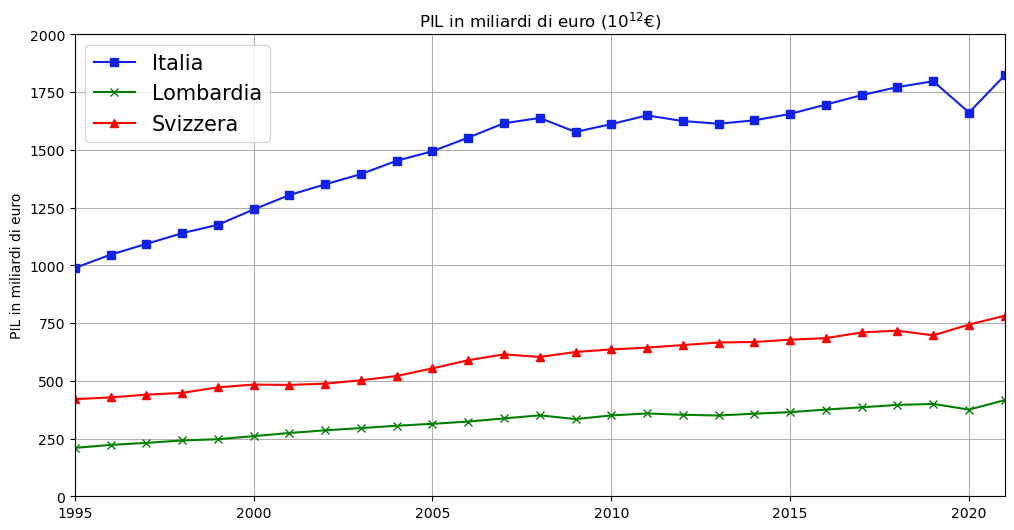

In [231]:
plt.figure(figsize=(12, 6))

plt.plot(years, gdp_italia/1000, label='Italia',marker='s',color='#1021EF')
plt.plot(years, gdp_lombardia/1000, label='Lombardia',marker='x', color='green')
plt.plot(years[:27], gdp_svizzera/1000, label='Svizzera',marker='^', color='#FF0000')
plt.ylabel('PIL in miliardi di euro')
plt.ylim(0,2000)
plt.legend(loc=2, prop={'size': 15})
plt.xlim(1995,2021)
plt.grid(True)
plt.rcParams['text.usetex'] = True
plt.title(r'PIL in miliardi di euro ($10^{12}$€)')
plt.show()


In [232]:
plt.rcParams['text.usetex'] = False

In [233]:
gpdProCapitaIta_dollari=pd.read_csv('dataset/gpdProCapitaIta.csv',sep=',', engine='python',decimal='.')
gpdProCapitaCh_dollari=pd.read_csv('dataset/gdpProCapitaSvizzera.csv',sep=',', engine='python',decimal='.')

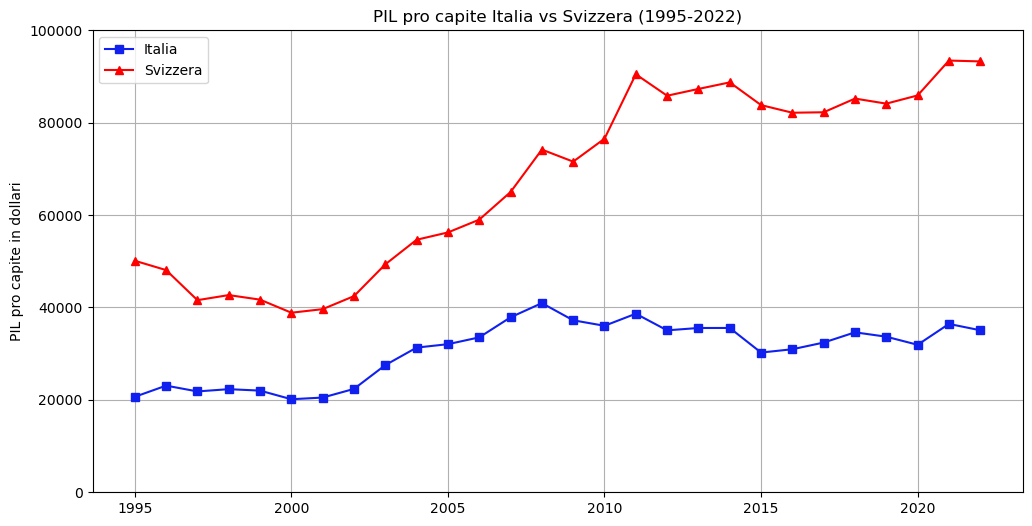

In [234]:
plt.figure(figsize=(12, 6))
plt.plot(gpdProCapitaIta_dollari['anno'], gpdProCapitaIta_dollari['gdpCapita'], label='Italia',marker='s',color='#1021EF')
plt.plot(gpdProCapitaCh_dollari['anno'], gpdProCapitaCh_dollari['gdpCapita'], label='Svizzera',marker='^', color='#FF0000')
plt.grid(True)
plt.title('PIL pro capite Italia vs Svizzera (1995-2022)')
plt.ylabel('PIL pro capite in dollari')
plt.ylim(0,100000)
plt.legend(loc=2, prop={'size': 15})
plt.legend()
plt.show()

Quanto è piu ricco uno svizzero, quanto investono in mezzi paragonato ad esso

%investita rispetto al pil pro capita di entrambi

In [235]:
econSvizzera=pd.read_csv('dataset/pilSvizzeraDollari.csv',sep=',', engine='python',decimal='.')
econItalia=pd.read_csv('dataset/pilItaliaDollari.csv',sep=',', engine='python',decimal='.')

In [236]:
invItalia = investimentiItalia.melt(id_vars=["Regione"], var_name="Year", value_name="Investimento")
invItalia['Investimento']=invItalia['Investimento']/1000
invItalia.head()

,Regione,Year,Investimento
0,Italia,2000,32122.9850
1,Italia,2001,40464.8167
2,Italia,2002,33377.0996
3,Italia,2003,36386.8745
4,Italia,2004,37809.2540


In [237]:
econItalia['Year'] = econItalia['Year'].astype(int)
invItalia['Year'] = invItalia['Year'].astype(int)
italia=econItalia.merge(invItalia, left_on='Year', right_on='Year')
italia=italia[['Year','GDP(milioni)','Investimento']]
italia['invPerGdp']=italia['Investimento']/italia['GDP(milioni)']*100
italia['invPerGdp']

0    1.474578
1    1.306561
2    1.376130
3    1.473573
4    1.501902
5    1.262277
6    1.396640
7    1.446042
8    1.337489
Name: invPerGdp, dtype: float64

In [238]:
invSvizzera=convertiRigaInIntero(investimentiPuliti,'Costi del trasporto ferroviario')
invSvizzera=invSvizzera.melt(id_vars=["tipo di investimento"], var_name="Year", value_name="Investimento")
invSvizzera=invSvizzera[invSvizzera['Year'].astype(int)<2020]
invSvizzera

C:\Users\Utente\AppData\Local\Temp\ipykernel_13644\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


,tipo di investimento,Year,Investimento
0,Costi del trasporto ferroviario,2010,9792.0
1,Costi del trasporto ferroviario,2011,9958.0
2,Costi del trasporto ferroviario,2012,10437.0
3,Costi del trasporto ferroviario,2013,10600.0
4,Costi del trasporto ferroviario,2014,10818.0
5,Costi del trasporto ferroviario,2015,10979.0
6,Costi del trasporto ferroviario,2016,11250.0
7,Costi del trasporto ferroviario,2017,11750.0
8,Costi del trasporto ferroviario,2018,11724.0
9,Costi del trasporto ferroviario,2019,12095.0


In [239]:
econSvizzera['Year'] = econSvizzera['Year'].astype(int)
invSvizzera['Year'] = invSvizzera['Year'].astype(int)
svizzera=econSvizzera.merge(invSvizzera, left_on='Year', right_on='Year')
svizzera= svizzera[['Year','GDP(milioni)','Investimento']]
svizzera['invPerGdp']=svizzera['Investimento']/svizzera['GDP(milioni)']*100
svizzera['invPerGdp']

0    1.676673
1    1.615849
2    1.690159
3    1.635424
4    1.581720
5    1.488979
6    1.500917
7    1.520498
8    1.391000
Name: invPerGdp, dtype: float64

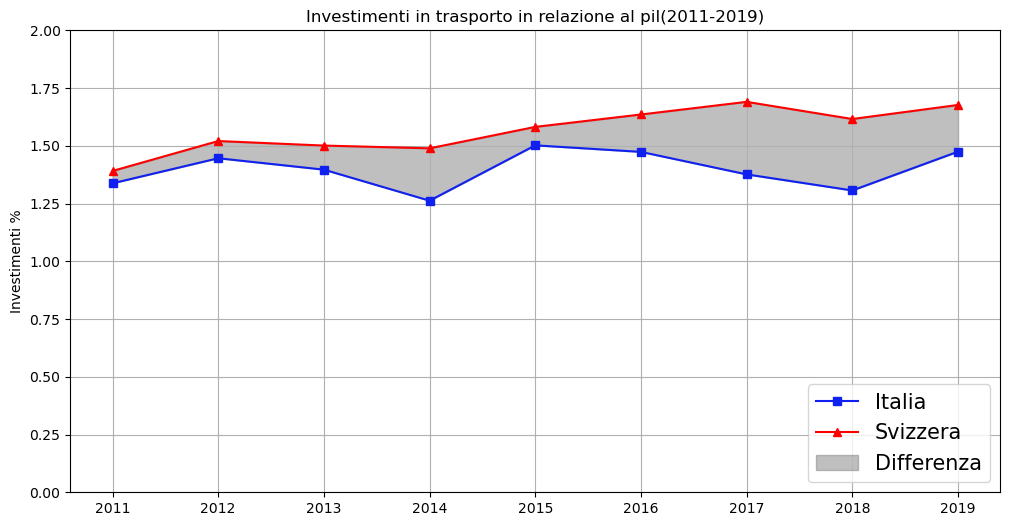

In [240]:
plt.figure(figsize=(12, 6))
plt.plot(italia['Year'], italia['invPerGdp'], label='Italia',marker='s',color='#1021EF')
plt.plot(svizzera['Year'], svizzera['invPerGdp'], label='Svizzera',marker='^', color='#FF0000')
plt.grid(True)

plt.ylim(0,2)
plt.title('Investimenti in trasporto in relazione al pil(2011-2019)')
plt.ylabel('Investimenti %')

plt.fill_between(italia['Year'], italia['invPerGdp'], svizzera['invPerGdp'], color='grey', alpha=0.5,label='Differenza')
plt.legend(loc=4,prop={'size': 15})
plt.show()


Quanto è grande questa differenza? Se l'italia avesse investito come la svizzera quanto avrebbe investito negli anni?

In [241]:
diff=svizzera['invPerGdp']-italia['invPerGdp']
diff

0    0.202095
1    0.309287
2    0.314028
3    0.161851
4    0.079817
5    0.226702
6    0.104276
7    0.074456
8    0.053510
Name: invPerGdp, dtype: float64

In [242]:
italia[italia['Year']==2019]['GDP(milioni)']*diff/100

0    4064.737331
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
dtype: float64

Circa 400milioni nel raggio di 10 anni, corrispondono a circa 7 euro a persona per anno

In [243]:
italia

,Year,GDP(milioni),Investimento,invPerGdp
0,2019,2011300,29658.1888,1.474578
1,2018,2091930,27332.3469,1.306561
2,2017,1961800,26996.9244,1.376130
3,2016,1877070,27659.9939,1.473573
4,2015,1836640,27584.5358,1.501902
5,2014,2162010,27290.5545,1.262277
6,2013,2141920,29914.9217,1.396640
7,2012,2086960,30178.3081,1.446042
8,2011,2294990,30695.2498,1.337489


In [244]:
italiaConInvestimentiSvizzeri=italia.merge(svizzera, left_on='Year', right_on='Year')
italiaConInvestimentiSvizzeri=italiaConInvestimentiSvizzeri[['Year','GDP(milioni)_x','invPerGdp_y']]
italiaConInvestimentiSvizzeri['investimentiConSpesaSvizzera']=italiaConInvestimentiSvizzeri['GDP(milioni)_x']*italiaConInvestimentiSvizzeri['invPerGdp_y']/100
italiaConInvestimentiSvizzeri

,Year,GDP(milioni)_x,invPerGdp_y,investimentiConSpesaSvizzera
0,2019,2011300,1.676673,33722.926131
1,2018,2091930,1.615849,33802.422836
2,2017,1961800,1.690159,33157.532857
3,2016,1877070,1.635424,30698.053482
4,2015,1836640,1.581720,29050.493662
5,2014,2162010,1.488979,32191.880094
6,2013,2141920,1.500917,32148.437843
7,2012,2086960,1.520498,31732.177850
8,2011,2294990,1.391000,31923.304232


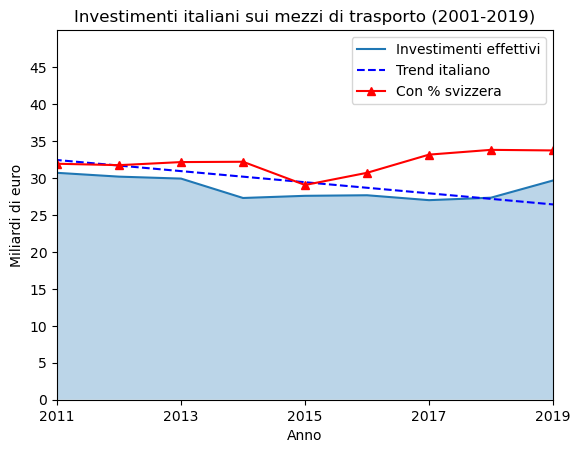

In [245]:
maxInv=50000000

x = investimentiItalia.columns[2:].astype(int)
y = investimentiItalia.iloc[0, 2:].astype(float)

coefficients = np.polyfit(x, y, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = linear_fit(x_fit)

plt.plot(x, y,label='Investimenti effettivi')
plt.fill_between(x, y, alpha=0.3)

plt.plot(x_fit, y_fit, '--', label='Trend italiano' ,color='blue')

plt.xticks(np.arange(x.min(), x.max()+1, step=2))
plt.yticks(np.arange(0, maxInv, step=5000000))


def scale_y(value, tick_number):
    return f'{value * 1e-6:.0f}'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(scale_y))
plt.plot(italiaConInvestimentiSvizzeri['Year'],italiaConInvestimentiSvizzeri['investimentiConSpesaSvizzera']*1000, marker='^', color='#FF0000',label="Con % svizzera",)

plt.xlabel('Anno')
plt.ylabel('Miliardi di euro')
plt.title('Investimenti italiani sui mezzi di trasporto (2001-2019)')
plt.legend()
plt.ylim(0,maxInv)
plt.xlim(2011,2019)
plt.show()

In [246]:
x_seCh=italiaConInvestimentiSvizzeri['Year']
y_seCh=italiaConInvestimentiSvizzeri['investimentiConSpesaSvizzera']*1000

In [247]:
coefficients = np.polyfit(x, y, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = linear_fit(x_fit)

coefficients = np.polyfit(x_seCh, y_seCh, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_seCh = np.linspace(x.min(), x.max(), 100)
y_fit_seCh = linear_fit(x_fit_seCh)

In [248]:
maxInv=50000000

x = investimentiItalia.columns[2:].astype(int)
y = investimentiItalia.iloc[0, 2:].astype(float)

In [249]:
investimentiItalia

,Regione,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
15,Italia,32122985.0,40464816.7,33377099.6,36386874.5,37809254.0,39005697.1,39175536.5,40734609.5,36945296.1,...,33328160.8,30695249.8,30178308.1,29914921.7,27290554.5,27584535.8,27659993.9,26996924.4,27332346.9,29658188.8


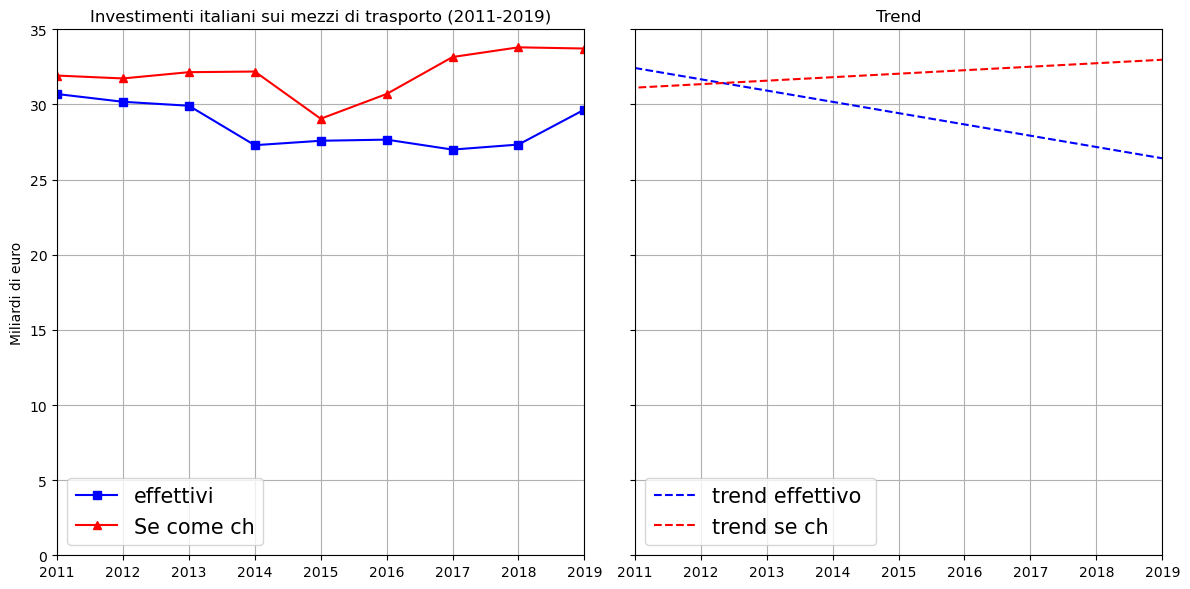

In [250]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axs[0].plot(x,y, color='blue', label='effettivi',marker='s')
axs[0].plot(x_seCh,y_seCh, color='#FF0000', label='Se come ch',marker='^')
axs[0].set_title('Investimenti italiani sui mezzi di trasporto (2011-2019)')
axs[0].set_ylabel('Miliardi di euro')
axs[0].legend(prop={'size': 15})
axs[0].grid(True)
axs[0].set_xlim(2011,2019)
# Plot the second graph

axs[1].plot(x_fit, y_fit,'--', color='blue', label='trend effettivo ')
axs[1].plot(x_fit_seCh, y_fit_seCh,'--', color='#FF0000', label='trend se ch')
axs[1].set_title('Trend')
axs[1].legend(prop={'size': 15})
axs[1].set_xlim(2011,2019)
axs[1].grid(True)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(scale_y))
plt.ylim(0,35000000)
plt.tight_layout()
plt.show()